<a href="https://colab.research.google.com/github/harishahamed26/PredictionOfHeartRate/blob/main/HeartRatePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heat Rate Prediction


Installation of pmdarima package

In [1]:
!pip install pmdarima 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 51.1 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [2]:
# Importing of Necessary Libraries

import pandas as pd
import numpy  as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


import statsmodels.api as sm
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error


In [3]:
# Reading the CSV File and Printing the first 5 rows
df_HeartRate = pd.read_csv('https://raw.githubusercontent.com/harishahamed26/PredictionOfHeartRate/main/PT_Train.csv')

df_HeartRate.head(5)

,Timestamp (GMT),Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
0,17/08/2015 15:09,139,41,NaN,NaN
1,17/08/2015 15:10,144,40,92.0,140.0
2,17/08/2015 15:11,140,42,89.0,144.0
3,17/08/2015 15:12,138,45,93.0,141.0
4,17/08/2015 15:13,133,42,94.0,134.0


# Data Cleaning and EDA

In [4]:
# Dropping the unnecessary atrributes

df_HeartRate = df_HeartRate.drop(['Lifetouch Respiration Rate', 'Oximeter SpO2',
       'Oximeter Pulse'], axis = 1)

In [5]:
df_HeartRate.info()  # Checking the information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Timestamp (GMT)       226 non-null    object
 1   Lifetouch Heart Rate  226 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ KB


In [6]:
df_HeartRate.describe() # Descriptive Statistic Analysis

,Lifetouch Heart Rate
count,226.000000
mean,2315.615044
std,11351.588825
min,106.000000
25%,136.000000
50%,145.000000
75%,156.000000
max,61442.000000


In [7]:
df_HeartRate.isna().sum() # Checking whether data has na/nan/null values

Timestamp (GMT)         0
Lifetouch Heart Rate    0
dtype: int64

In [8]:
# Replacing the / to -  to process datetime 

df_HeartRate['Timestamp (GMT)'] = df_HeartRate['Timestamp (GMT)'].replace({'/' : '-'} , regex=True)
df_HeartRate['Timestamp (GMT)'] 

0      17-08-2015 15:09
1      17-08-2015 15:10
2      17-08-2015 15:11
3      17-08-2015 15:12
4      17-08-2015 15:13
             ...       
221    17-08-2015 18:50
222    17-08-2015 18:51
223    17-08-2015 18:52
224    17-08-2015 18:53
225    17-08-2015 18:54
Name: Timestamp (GMT), Length: 226, dtype: object

In [9]:
# Generating the step count based length of the dataset

Step_Count = list(range(0, len(df_HeartRate)))


In [10]:
# Defining the plotting function

def Plot_TimeSeries(x,y):  
    plt.figure(figsize=(10,10))
    plt.plot(x ,y , color = 'Red')
    plt.title("Line Graph for 'Lifetouch Heart Rate' and 'Step Count' ")
    plt.xlabel('Lifetouch Heart Rate')
    plt.ylabel('Step Count')
    plt.show()


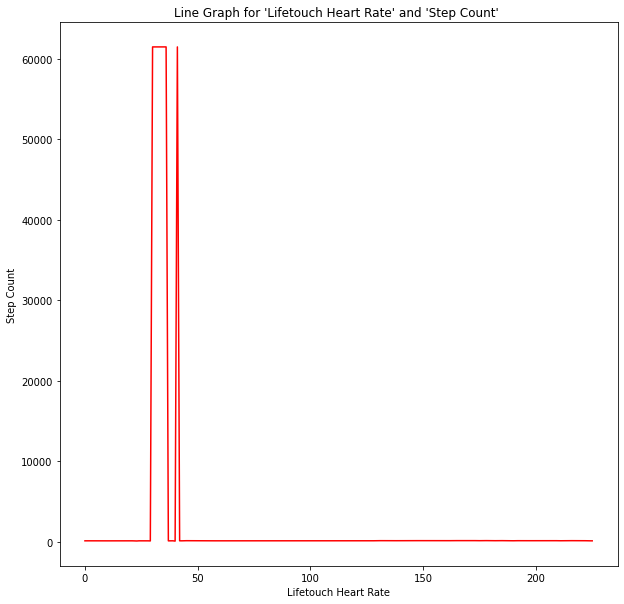

In [11]:
'''
 Calling the plotting function by passing the attributes
 x = df_HeartRate['Timestamp (GMT)']
 y = Step Count
'''

Plot_TimeSeries(Step_Count,df_HeartRate['Lifetouch Heart Rate'])

In [12]:
# Defining the function to checking statiionarity

def Check_Stationary(series):
    statistic, p_value, n_lags, critical_values = sm.tsa.stattools.kpss(series)
    print(f'p value : {p_value}')
    if p_value > 0.05:                    # confidence interval = 95%
      print('The series is stationary')
    else: 
      print('The series is not stationary')
    



In [13]:
# Importing warning to ignore the unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

# Calling the stationary funciton to check stationarity
Check_Stationary(df_HeartRate['Lifetouch Heart Rate'])

p value : 0.1
The series is stationary



 Plotting the graph after removing the noise


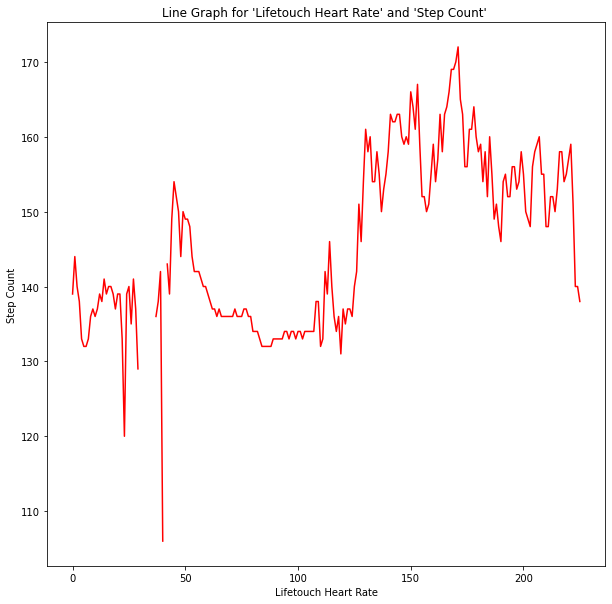

In [14]:
# Removing the noise using np where function
df_HeartRate['Lifetouch Heart Rate'] = np.where(df_HeartRate['Lifetouch Heart Rate']>200,np.nan,df_HeartRate['Lifetouch Heart Rate'])

print('\n Plotting the graph after removing the noise')
Plot_TimeSeries(Step_Count,df_HeartRate['Lifetouch Heart Rate'])



 Plotting the graph after filling the noise


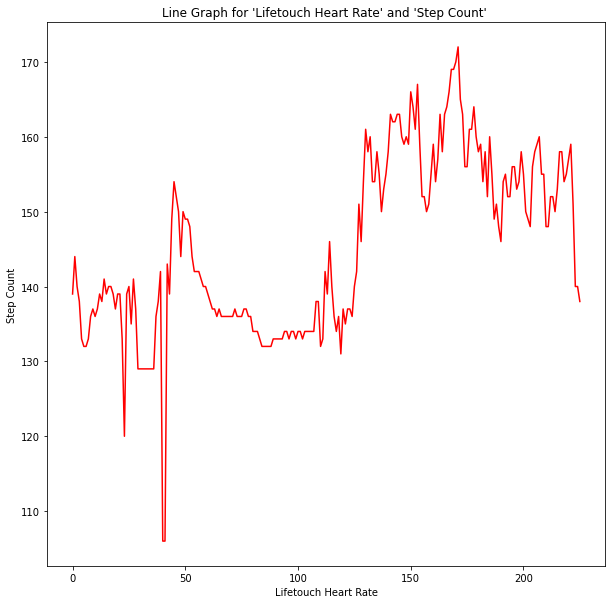

In [15]:
# Using forward fill method to fill the nan values
df_HeartRate['Lifetouch Heart Rate']= df_HeartRate['Lifetouch Heart Rate'].ffill()
df_HeartRate['Lifetouch Heart Rate']= df_HeartRate['Lifetouch Heart Rate'].bfill()
print('\n Plotting the graph after filling the noise')
Plot_TimeSeries(Step_Count,df_HeartRate['Lifetouch Heart Rate'])


In [16]:
# Convert the month column to a datetime object
df_HeartRate['Timestamp (GMT)'] = pd.to_datetime(df_HeartRate['Timestamp (GMT)'])


In [17]:
# Checking the stationarity

Check_Stationary(df_HeartRate['Lifetouch Heart Rate'])

p value : 0.01
The series is not stationary


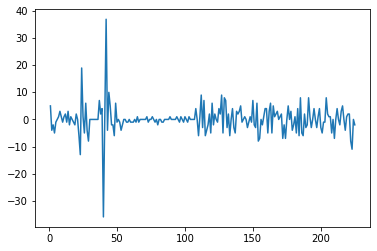

In [18]:
df_HeartRate['Lifetouch Heart Rate'].diff().dropna().plot()

# ACF & PACF


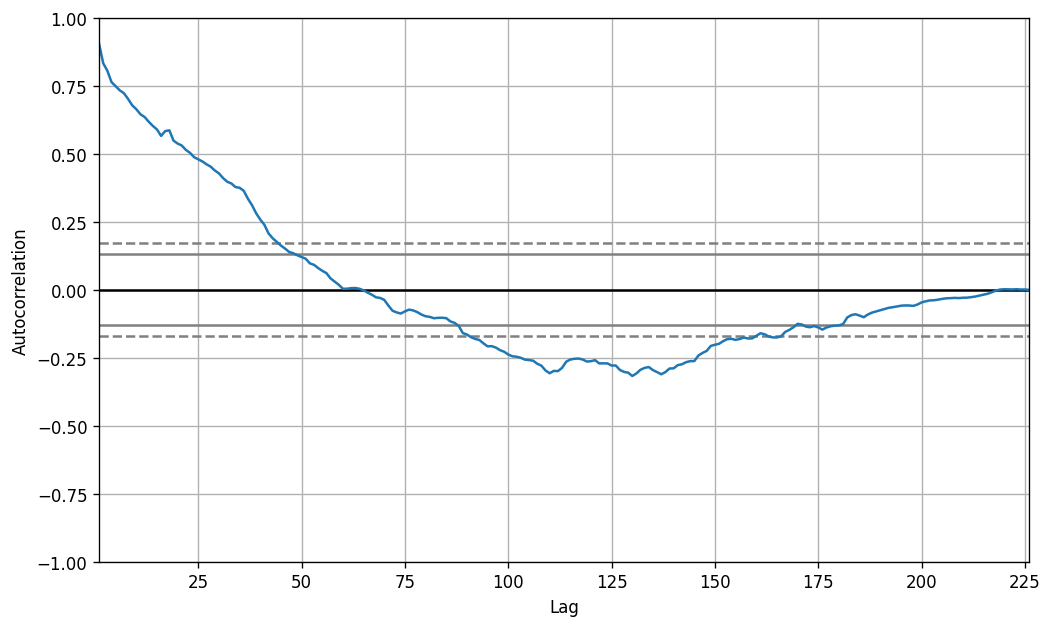

In [19]:
# Test for seasonality - Autocorrelation Function (ACF) plot. 
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(df_HeartRate['Lifetouch Heart Rate'].tolist())

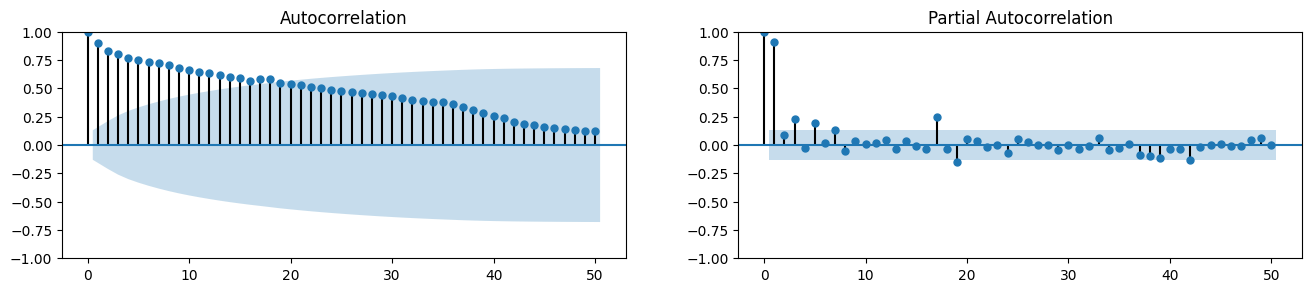

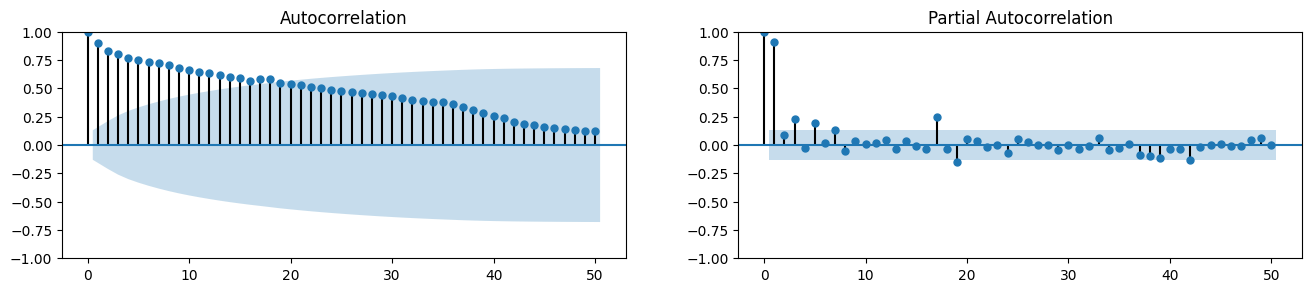

In [20]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df_HeartRate['Lifetouch Heart Rate'].tolist(), lags=50, ax=axes[0])
plot_pacf(df_HeartRate['Lifetouch Heart Rate'].tolist(), lags=50, ax=axes[1])

# Model Building

In [21]:
# Selecting the order for ARIMA  model

model_fit = auto_arima(df_HeartRate['Lifetouch Heart Rate'], m=12,d=0,D=0,max_order=None,max_p=7,max_q=7,
                       max_d=2,max_P=7,max_Q=7,max_D=2,maxiter = 100,alpha = 0.05,n_jobs = -1,seasonal=True,
                       trace=True,error_action='ignore',  suppress_warnings=True, stepwise=True
                       )

model_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=9.00 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1759.996, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1375.351, Time=1.18 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1508.019, Time=0.73 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2894.836, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1374.659, Time=0.10 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=1375.344, Time=1.61 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=1377.336, Time=2.05 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=1375.305, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1374.085, Time=0.94 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=1375.292, Time=2.17 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=1375.276, Time=1.18 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=1376.004, Time=5.32 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1552.493, Time=0.33 sec
 ARIMA(2,0,1)(0,0,0)[12]

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  226
Model:               SARIMAX(2, 0, 2)   Log Likelihood                -673.828
Date:                Sat, 18 Feb 2023   AIC                           1359.655
Time:                        14:36:07   BIC                           1380.178
Sample:                             0   HQIC                          1367.937
                                - 226                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      8.4593      4.394      1.925      0.054      -0.153      17.072
ar.L1          0.5456      0.145      3.757      0.000       0.261       0.830
ar.L2          0.3958      0.147      2.694      0.007       0.108       0.684
ma.L1          0.2905      0.126      2.302      0.021       0.043       0.538
ma.L2         -0.3651      0.056     -6.465      0.000      -0.476      -0.254
sigma2        22.5565      1.050     21.486      0.000      20.499      24.614
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              2307.23
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.41   Skew:                            -1.10
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## ARIMA

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        144.2320      5.901     24.443      0.000     132.667     155.797
ar.L1          0.5457      0.145      3.755      0.000       0.261       0.831
ar.L2          0.3956      0.147      2.691      0.007       0.108       0.684
ma.L1          0.2903      0.126      2.300      0.021       0.043       0.538
ma.L2         -0.3651      0.056     -6.464      0.000      -0.476      -0.254
sigma2        22.5613      1.050     21.482      0.000      20.503      24.620


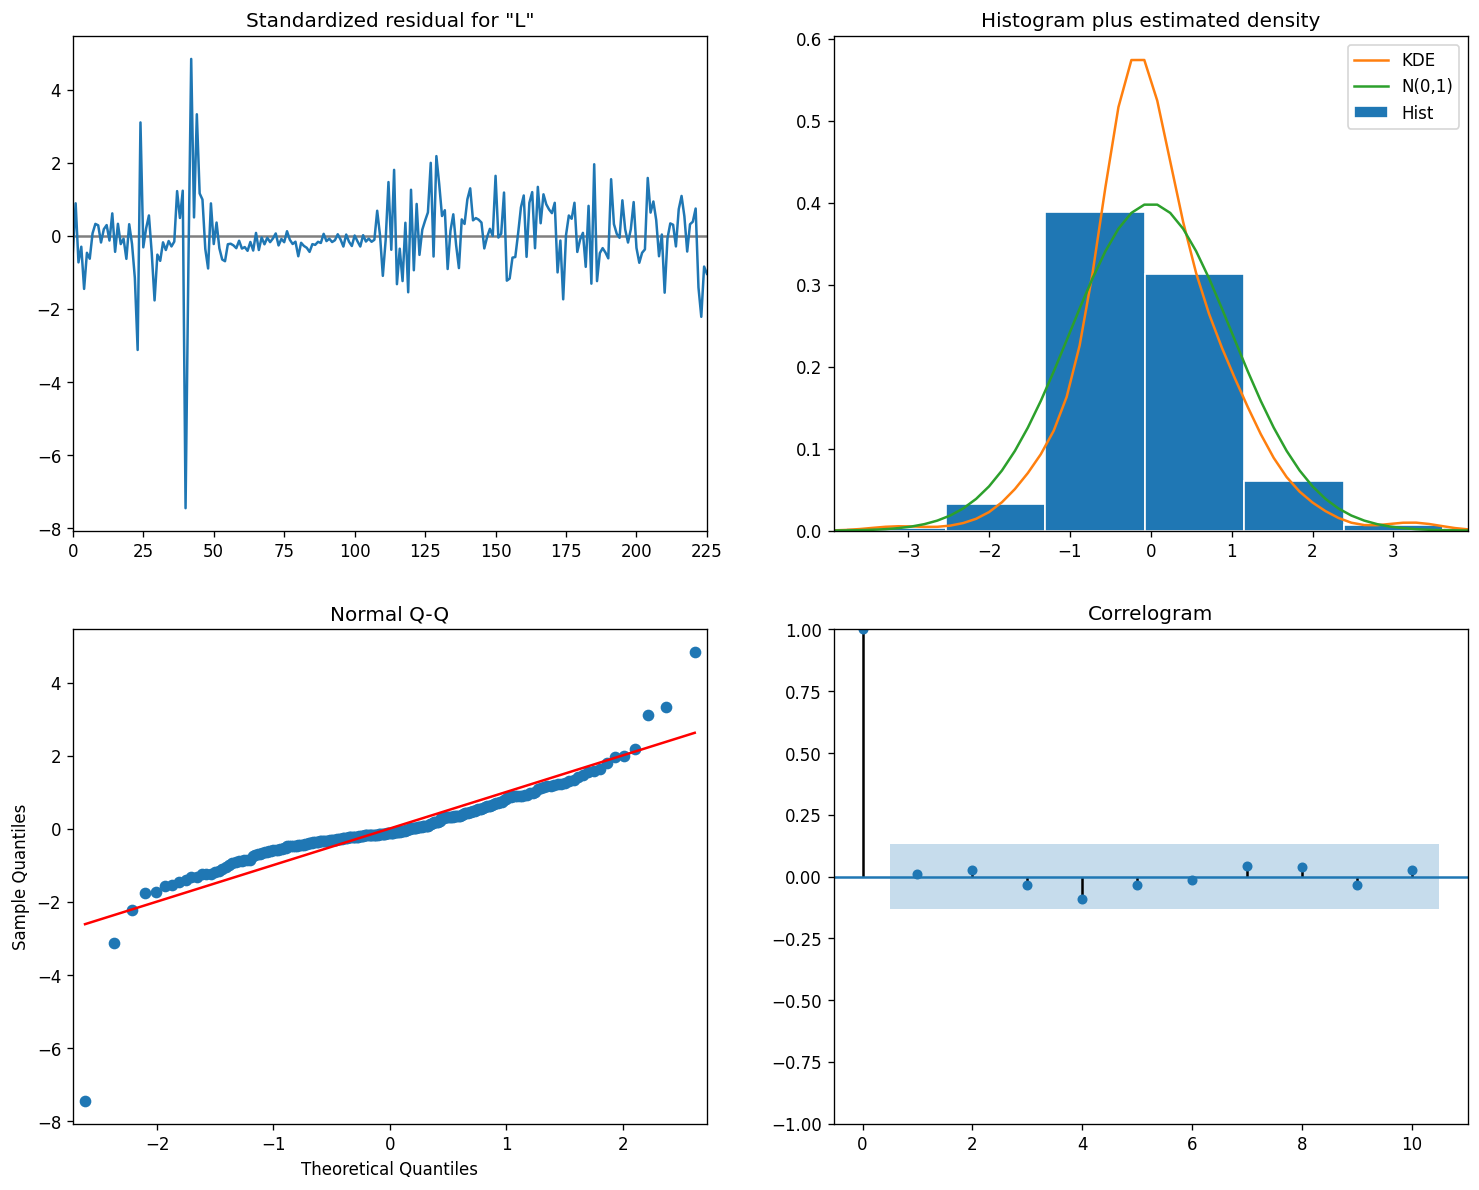

In [22]:
# Import the necessary libraries
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA

# Split the data into training and testing sets

train = df_HeartRate['Lifetouch Heart Rate']
test = df_HeartRate['Lifetouch Heart Rate'][226:]



# Fit the ARMA model
model = sm.tsa.arima.ARIMA(train, order=(2,0,2))
model_fit = model.fit()
print(model_fit.summary().tables[1])
model_fit.plot_diagnostics(figsize=(15,12))
plt.show()

In [23]:
l1  = len(df_HeartRate['Lifetouch Heart Rate'])
l2  = len(df_HeartRate['Lifetouch Heart Rate'])+20


In [24]:
# testing 

#df_HeartRate['predict'] =  model_fit.predict(start='2015-08-17 18:54:00', end='2015-08-17 19:15:00')

Forecast =  model_fit.predict(start = 0, end=l1)
Predict_20M =  model_fit.predict(start = l1+1, end=l2)

In [25]:
from math import sqrt
from sklearn.metrics import mean_squared_error

 
MSE = np.square(np.subtract(df_HeartRate['Lifetouch Heart Rate'],Forecast)).mean() 
 
MAPE = np.mean(np.abs(Forecast - df_HeartRate['Lifetouch Heart Rate'])/np.abs(df_HeartRate['Lifetouch Heart Rate'])) 
RMSE = sqrt(MSE)
print(f'MSE {MSE},RMSE {RMSE}, MAPE {MAPE}')

MSE 22.68071105969492,RMSE 4.762427013581932, MAPE 0.021136224903592984


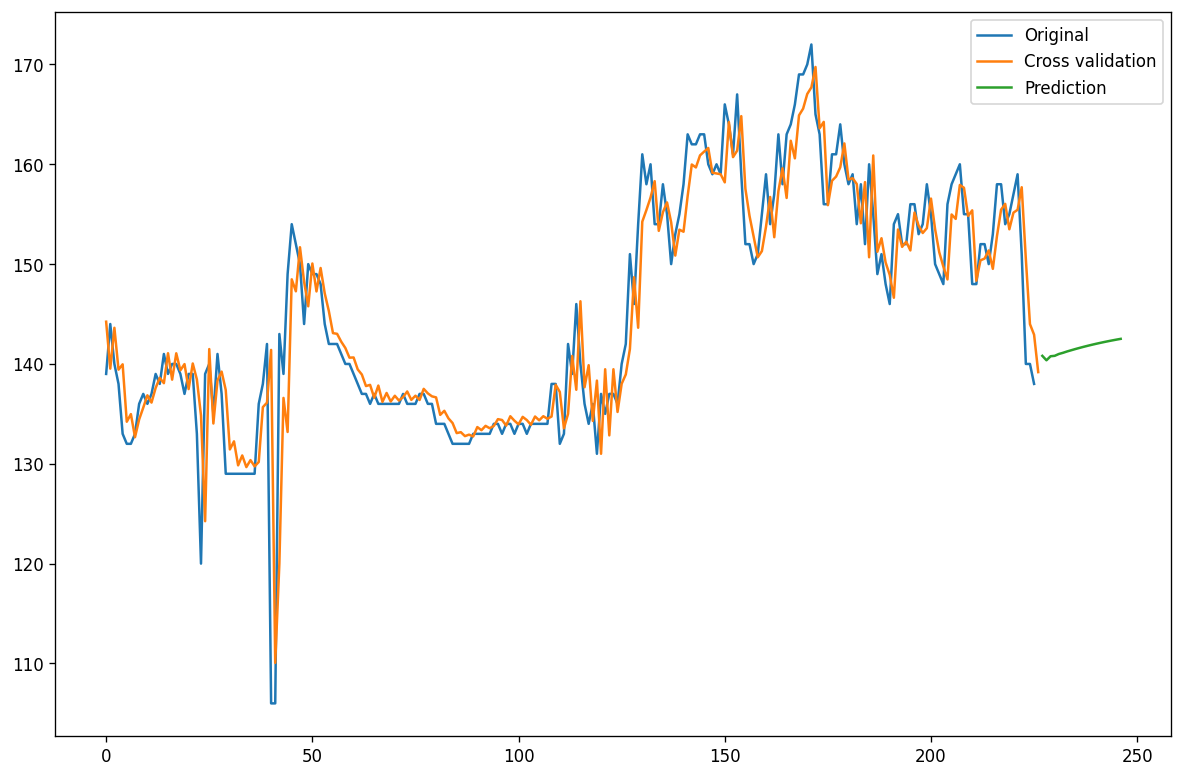

In [39]:
df_HeartRate['Lifetouch Heart Rate'].plot(figsize=(12,8), label = 'Original')
Forecast.plot( label = 'Cross validation')
Predict_20M.plot(label = 'Prediction')
plt.legend()

## SARIMAX

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6944      0.166      4.180      0.000       0.369       1.020
ar.L2          0.3055      0.165      1.850      0.064      -0.018       0.629
ma.L1          0.1584      0.137      1.157      0.247      -0.110       0.427
ma.L2         -0.4104      0.041     -9.893      0.000      -0.492      -0.329
sigma2        23.0697      1.070     21.563      0.000      20.973      25.167


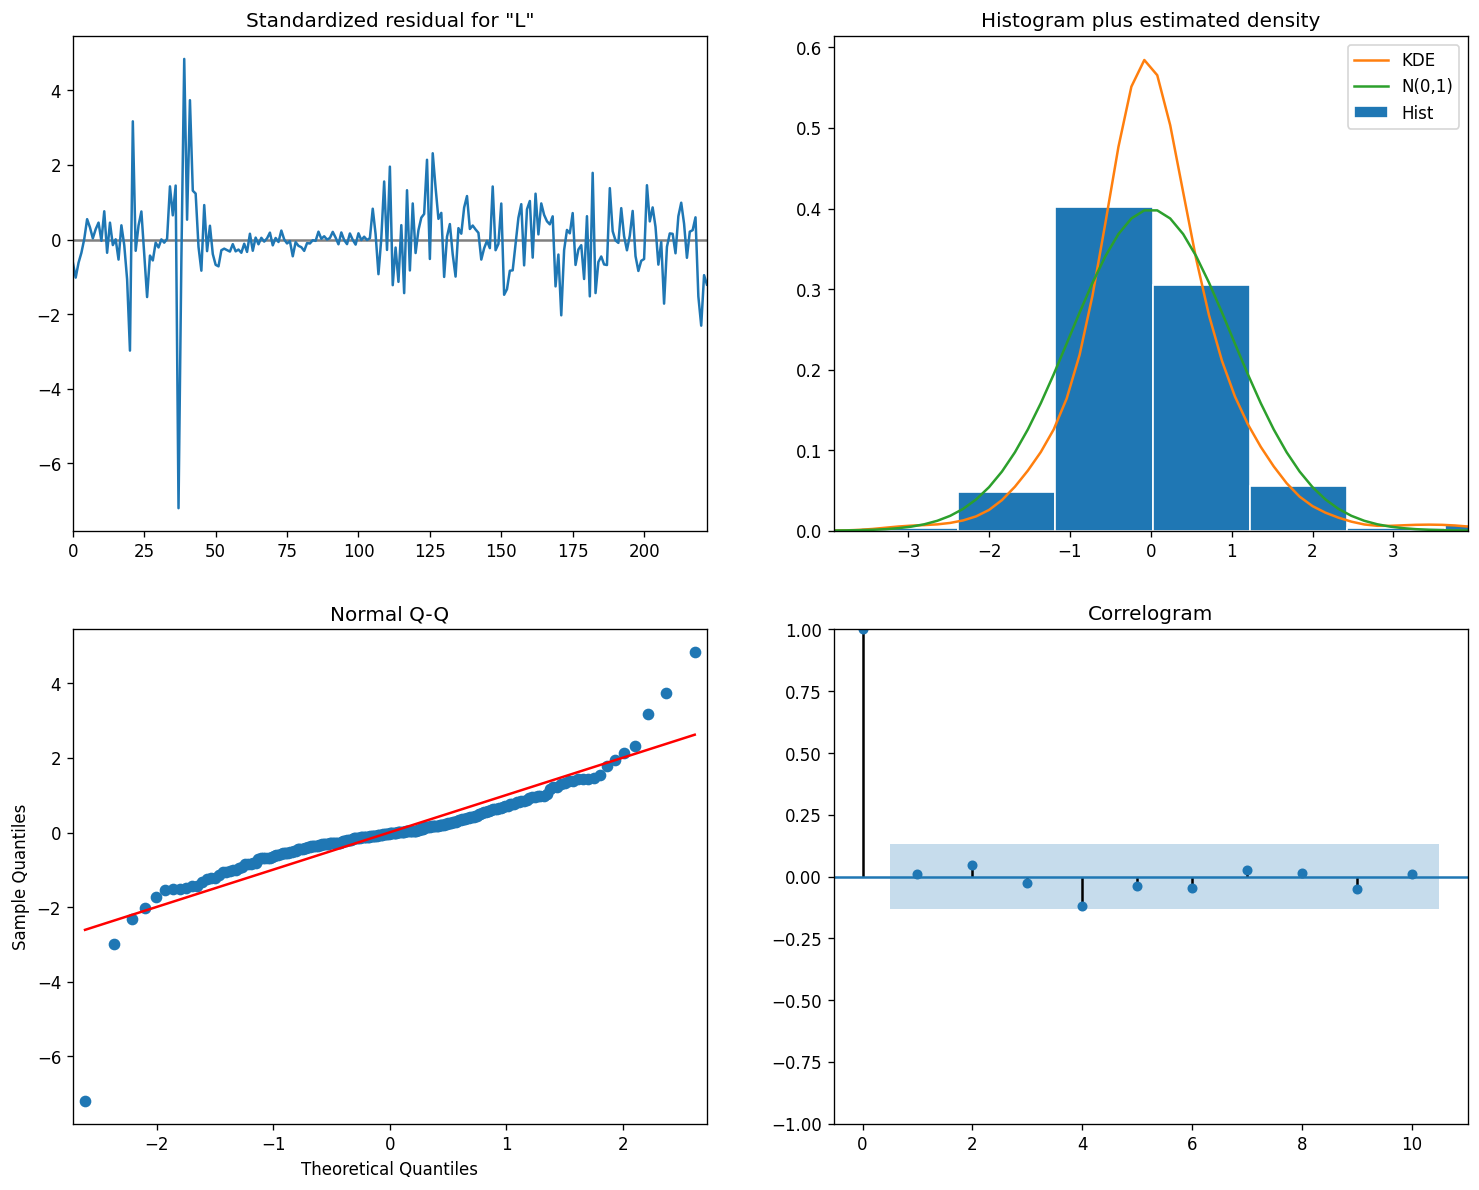

In [27]:
# Implementaiton of SARIMAX

mod = sm.tsa.statespace.SARIMAX(train,
                                order=(2, 0, 2),
                                seasonal_order=(0,0,0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit() 

print(results.summary().tables[1])

results.plot_diagnostics(figsize=(15,12))
plt.show()

In [28]:
Forecast_S =  results.predict(start = 0, end=l1)
Predict_20M_S =  results.predict(start = l1+1, end=l2)

In [29]:
print(Forecast_S)

0        0.000000
1       96.520726
2      142.451032
3      141.200101
4      138.339496
          ...    
222    158.323628
223    151.087722
224    144.587536
225    143.802177
226    139.553329
Name: predicted_mean, Length: 227, dtype: float64


In [30]:
from math import sqrt
from sklearn.metrics import mean_squared_error

 
MSE = np.square(np.subtract(df_HeartRate['Lifetouch Heart Rate'],Forecast_S)).mean() 
 
RMSE = sqrt(MSE)
print(MSE, RMSE)

118.28424697783282 10.87585614918811


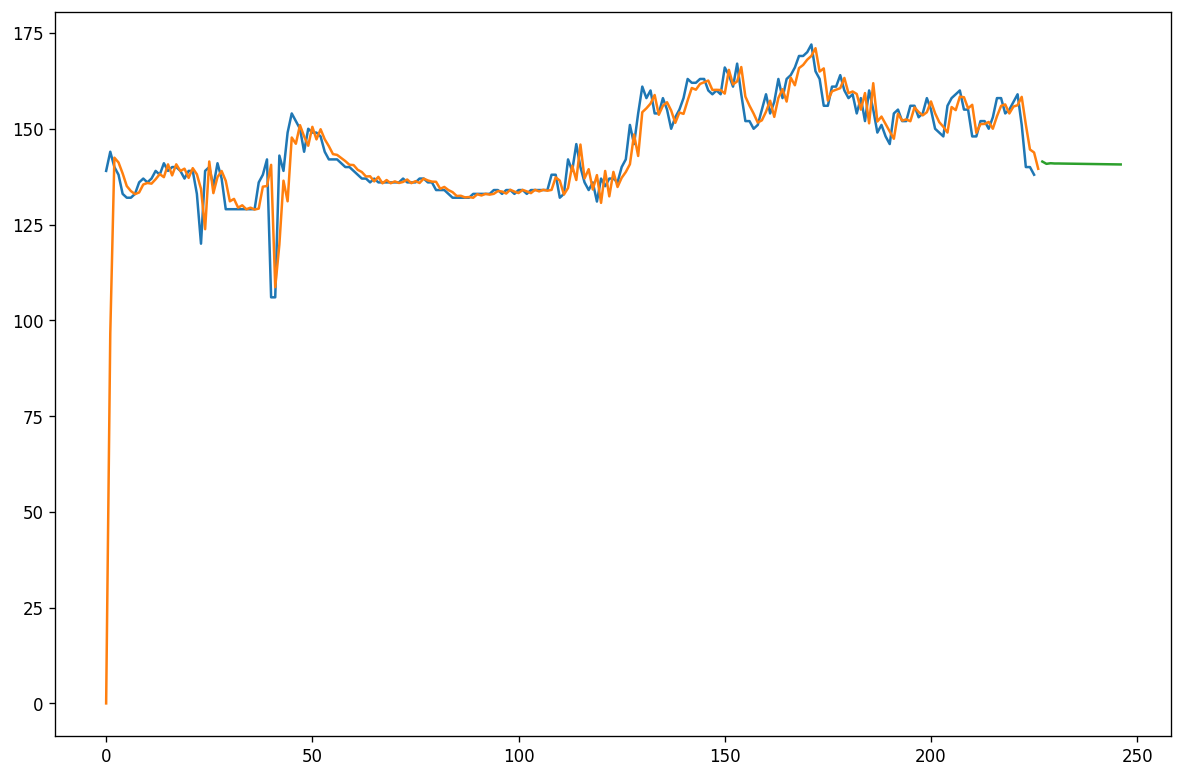

In [31]:
df_HeartRate['Lifetouch Heart Rate'].plot(figsize=(12,8))
Forecast_S.plot()
Predict_20M_S.plot()

## AutoTS


In [32]:
! pip install autots

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.4/686.4 KB 12.3 MB/s eta 0:00:00


In [33]:
df_HeartRate['Timestamp (GMT)'].head(5)

0   2015-08-17 15:09:00
1   2015-08-17 15:10:00
2   2015-08-17 15:11:00
3   2015-08-17 15:12:00
4   2015-08-17 15:13:00
Name: Timestamp (GMT), dtype: datetime64[ns]

In [ ]:
from autots import AutoTS
mod = AutoTS(forecast_length=20, frequency='infer',  ensemble='simple')

mod = mod.fit(df_HeartRate, date_col='Timestamp (GMT)', value_col='Lifetouch Heart Rate', id_col=None)


prediction = mod.predict()

forecast = prediction.forecast


In [35]:
forecast

,Lifetouch Heart Rate
2015-08-17 18:55:00,145.486963
2015-08-17 18:56:00,145.507527
2015-08-17 18:57:00,145.500000
2015-08-17 18:58:00,145.298333
2015-08-17 18:59:00,145.359065
2015-08-17 19:00:00,145.412065
2015-08-17 19:01:00,145.415613
2015-08-17 19:02:00,145.443259
2015-08-17 19:03:00,146.553832
2015-08-17 19:04:00,146.153691


Text(0.5, 1.0, 'Forecast using AutoTS model')

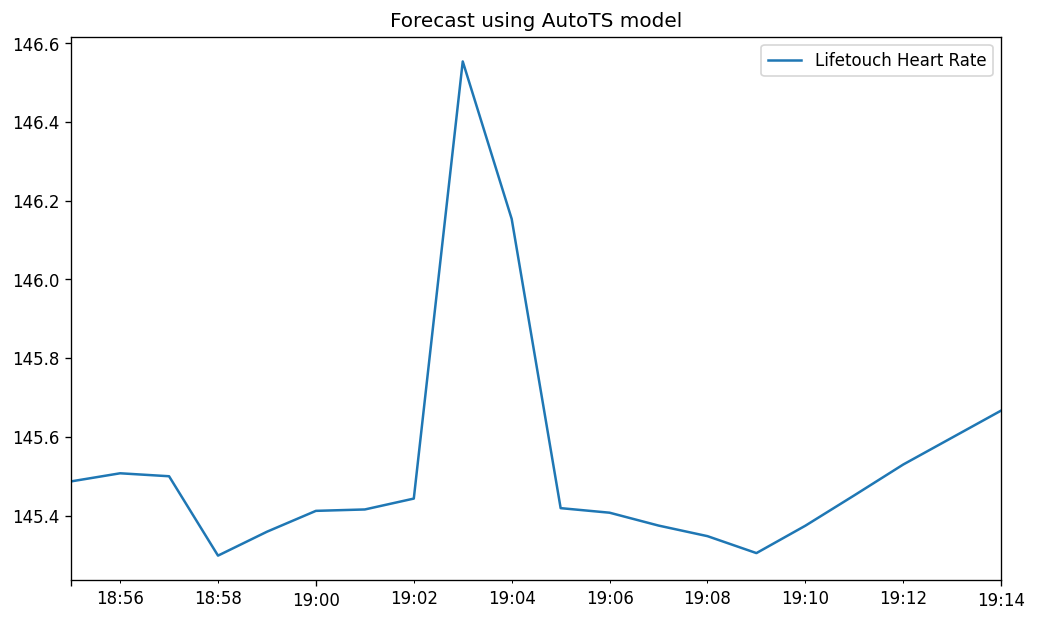

In [41]:
forecast.plot()
plt.title('Forecast using AutoTS model')


In [56]:
predictTS = forecast.reset_index(drop=True)
predictTS['Lifetouch Heart Rate']

0     145.486963
1     145.507527
2     145.500000
3     145.298333
4     145.359065
5     145.412065
6     145.415613
7     145.443259
8     146.553832
9     146.153691
10    145.418979
11    145.407371
12    145.374695
13    145.347797
14    145.304761
15    145.374360
16    145.451513
17    145.529856
18    145.598354
19    145.666868
Name: Lifetouch Heart Rate, dtype: float64

In [57]:
# Created by Hansi at 12/16/2022

import json



data = []
for pred in Predict_20M:
    data.append({'prediction': pred})


submission_file_path = "submissionArima.json"
with open(submission_file_path, 'w') as fp:
    fp.write('\n'.join(json.dumps(i) for i in data))


data1 = []
for pred in predictTS['Lifetouch Heart Rate']:
    data1.append({'prediction': pred})


submission_file_path = "submissionAutoTS.json"
with open(submission_file_path, 'w') as fp:
    fp.write('\n'.join(json.dumps(i) for i in data1))